## Using the materialxMaterials API

To use the API the package can be installed by cloning the repository and then installing it using pip

In [1]:
# pip install . 

Each loader is encapsulated in a different class. Currently there are two loaders:

- `GPUOpenMaterialLoader` which can downlad materials from the AMD GPUOpen database
- `PhysicallyBasedMaterialXLoader` which can download materials from the PhysicallyBased database

### GPUOpenMaterialLoader

In [2]:
from materialxMaterials import GPUOpenLoader

loader = GPUOpenLoader.GPUOpenMaterialLoader()

# Download materials
materials = loader.getMaterials()
materialNames = loader.getMaterialNames()
materialCount = len(materialNames)
print(f'Available number of materials: {materialCount}')


INFO:GPUO:Fetch set of materials: limit: 100 offset: 100
INFO:GPUO:Fetch set of materials: limit: 100 offset: 200
INFO:GPUO:Fetch set of materials: limit: 100 offset: 300
INFO:GPUO:Fetch set of materials: limit: 100 offset: 400


Available number of materials: 454


#### Downloading Material Packages

A regular expression can be used to search for materials. The search is case insensitive and the regular expression is applied to the material name.

The `downloadPackageByExpression()` method is used below to download all materials that contain the word "Canyon Maple Dark Wood" in their name.

The second argument specifies the package number. Different packages have different resolution images. We use `0` to get the first package.

In [3]:
searchExpr = 'Canyon Maple Dark Wood'
dataItems = loader.downloadPackageByExpression(searchExpr, 0)
for dataItem in dataItems:
    print('Found material: ', dataItem[1])
    data = dataItem[0]
    title = dataItem[1]

INFO:GPUO:> Download material: Canyon Maple Dark Wood List: 0. Index: 89


Found material:  Canyon Maple Dark Wood


The `downloadPackageByExpression()` method returns a list of material data. The data is in the form of a zip file from which data can be extracted.

In the sample code, the MaterialX file and the images are extracted from the zip file. Image extraction requires passing over the `pillow` module.

- MaterialX file Canyon_Maple_Dark_Wood.mtlx
- Image file textures/Canyon_Maple_Dark_Wood_Mask.png


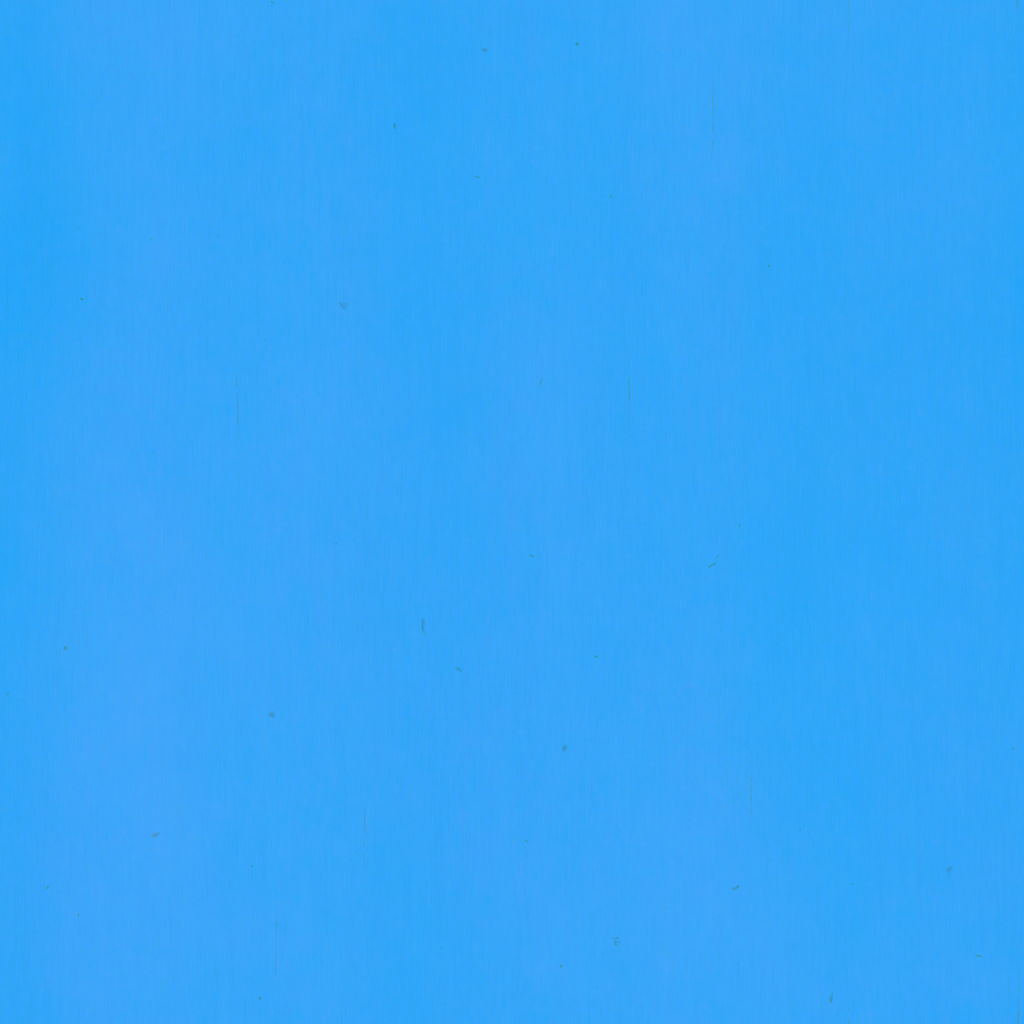

- Image file textures/Canyon_Maple_Dark_Wood_Normal.png


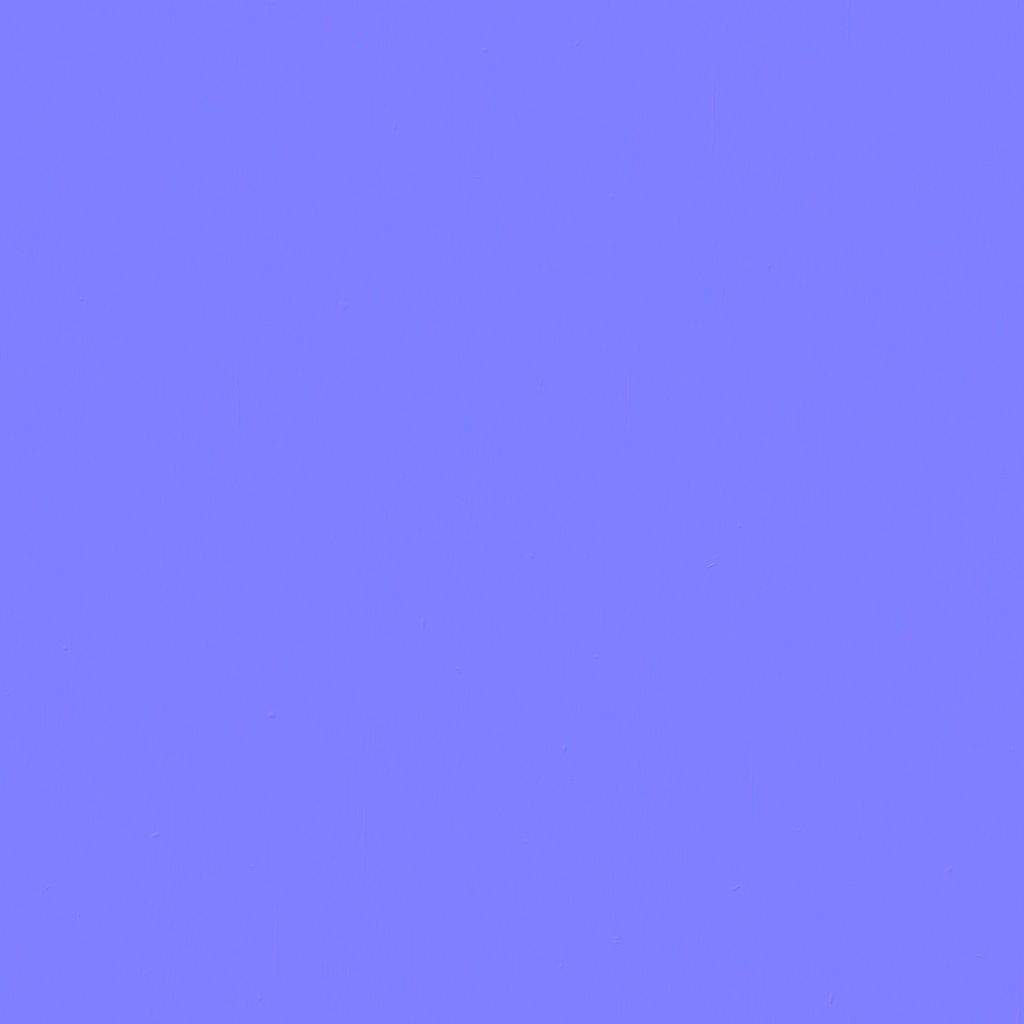

- Image file textures/Canyon_Maple_Dark_Wood_baseColor.png


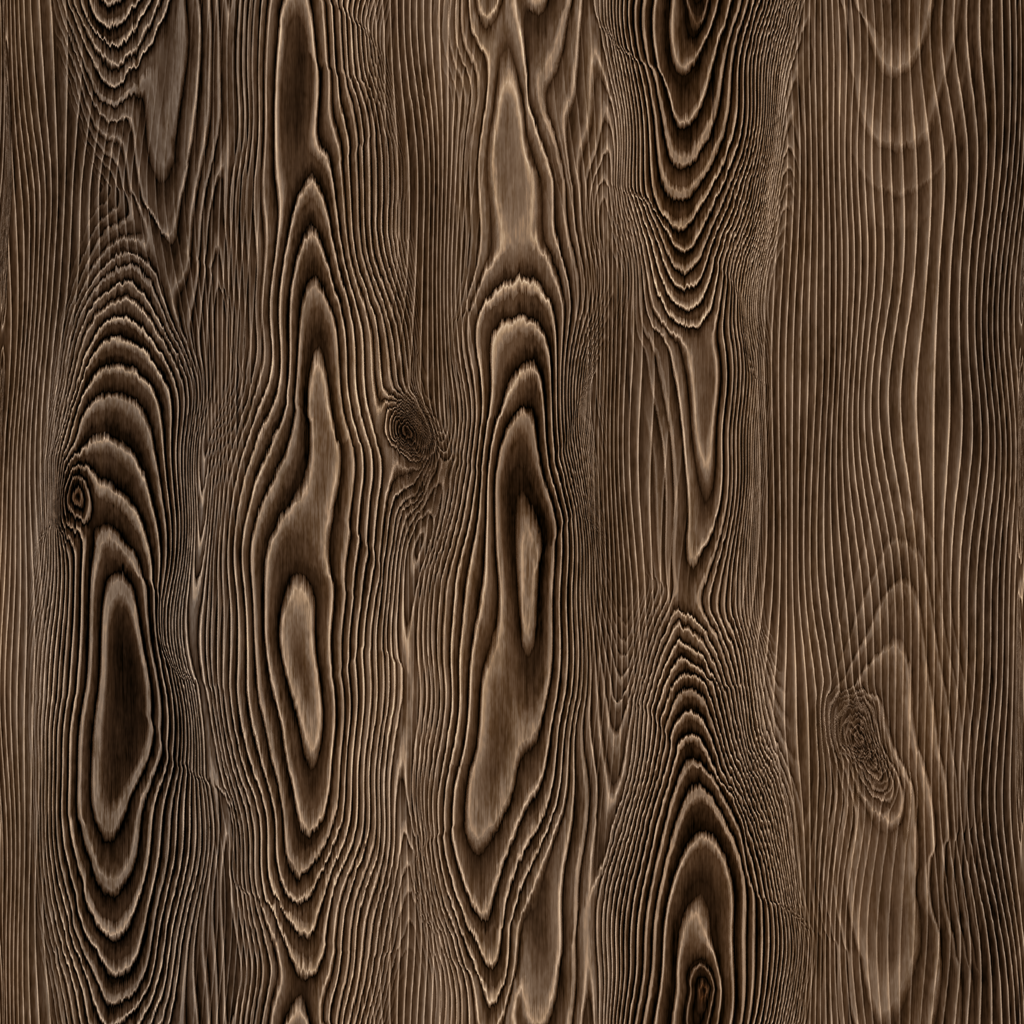

In [4]:
import io
import zipfile
from PIL import Image
from IPython.display import display

extracted_data = loader.extractPackageData(data, Image)
if extracted_data:
    for item in extracted_data:
        if item['type'] == 'mtlx':
            print(f'- MaterialX file {item["file_name"]}')
        elif item["type"] == 'image':
            print(f'- Image file {item["file_name"]}')
            image = item["data"]
            display(image)

Materials packages can also be downloaded by index into the material lists. The `downloadPackageByIndex()` method is used to download the the 3rd material in the list. The last argument is the package number.

In [5]:
indices = [0, 2, 0]
materialList = int(indices[0])
materialIndex = int(indices[1])
materialPackage = int(indices[2])
[data, title] = loader.downloadPackage(materialList, materialIndex, materialPackage)

extracted_data = loader.extractPackageData(data, None)
if extracted_data:
    for item in extracted_data:
        if item['type'] == 'mtlx':
            print(f'- MaterialX file {item["file_name"]}')
        elif item["type"] == 'image':
            print(f'- Image file {item["file_name"]}')


- MaterialX file Art_Deco_Gatsby_Wallpaper.mtlx
- Image file textures/Art_Deco_Gatsby_Wallpaper_Mask.png
- Image file textures/Art_Deco_Gatsby_Wallpaper_baseColor.png
- Image file textures/Art_Deco_Gatsby_Wallpaper_Normal.png


## PhysicallyBasedMaterialXLoader

The `PhysicallyBasedMaterialXLoader` has a dependence on MaterialX to generate MaterialX documents from the material
descriptions downloaded from the PhysicallyBased database.

The material information can first be downloaded using `getMaterialsFromURL()` method. The method returns a list of material data in JSON format

In [9]:
from materialxMaterials import physicallyBasedMaterialX as pbmx
import MaterialX as mx

jsonMat = None
pb_loader = pbmx.PhysicallyBasedMaterialLoader(mx, None)
jsonMat = pb_loader.getMaterialsFromURL()

# Print JSON formatted
#import json
#print(json.dumps(jsonMat, indent=4))

This data can be parsed to create MaterialX documents using the `convertToMaterialX()` method.


In [7]:
#matdoc = pb_loader.convertToMaterialX(['Banana'], shadingModels[0], {}, shadingModelPrefixes[0])

will result in this output:

```xml
<?xml version="1.0"?>
<materialx version="1.39">
  <!--Physically Based Materials from https://api.physicallybased.info -->
  <!--  Processsed via API and converted to MaterialX -->
  <!--  Target Shading Model: standard_surface-->
  <!--  Utility Author: Bernard Kwok. kwokcb@gmail.com -->
  <!-- Generated shader: SHD_PBM_SS_Banana -->
  <standard_surface name="SHD_PBM_SS_Banana" type="surfaceshader" doc="Reference: https://raw.githubusercontent.com/AntonPalmqvist/physically-based-api/main/images/renders/cycles/600/banana.jpeg">
    <input name="base_color" type="color3" value="0.634,0.532,0.111" />
    <input name="metalness" type="float" value="0" />
    <input name="specular_roughness" type="float" value="0.5" />
    <input name="specular_IOR" type="float" value="1.5" />
  </standard_surface>
  <!-- Generated material: MAT_PBM_SS_Banana -->
  <surfacematerial name="MAT_PBM_SS_Banana" type="material">
    <input name="surfaceshader" type="surfaceshader" nodename="SHD_PBM_SS_Banana" />
  </surfacematerial>
</materialx>
```